

[lacentrale](https://www.lacentrale.fr/listing)



# Les voitures selon [lacentrale.fr](https://www.lacentrale.fr/listing)

<img src= ''>

L'objectif de ce projet est de collecter les données des voitures présents sur la page `https://www.lacentrale.fr/listing` du site lacentrale.fr.

Les données que nous collecterons seront les suivantes :
name
price
year
origin
registration_date
technical_inspection
first_hand
mileage
fuel_type
transmission
num_doors
num_seats
power
co2_emission
length
trunk_volume
critair_rating
combined_consumption

# Lacentrale

### Différentes Méthodes utilisées pour le scrapping

In [2]:
import requests
from lxml import etree
from bs4 import BeautifulSoup
from urllib.parse import urljoin
import pandas as pd
from tqdm import tqdm


# Function to fetch a page
def fetch_page(url, page=None):
    if page is not None:
        url = f"{url}?page={page}"
    with requests.Session() as session:
        response = session.get(url)
        soup = BeautifulSoup(response.content, features="lxml")
        return soup


# Function to extract details of a car
def extract_car_details(car_card):
    car = {
        "name": None,
        "price": None,
        "year": None,
        "origin": None,
        "registration_date": None,
        "technical_inspection": None,
        "first_hand": None,
        "mileage": None,
        "fuel_type": None,
        "transmission": None,
        "num_doors": None,
        "num_seats": None,
        "power": None,
        "co2_emission": None,
        "length": None,
        "trunk_volume": None,
        "critair_rating": None,
        "combined_consumption": None,
    }

    dom = etree.HTML(str(car_card))

    if (
        car_card.find(
            "div",
            class_="Text_Text_text SummaryInformation_title__5CYhW Text_Text_headline3",
        )
        != None
    ):
        car["name"] = car_card.find(
            "div",
            class_="Text_Text_text SummaryInformation_title__5CYhW Text_Text_headline3",
        ).text.strip()

    if car_card.find("span", class_="PriceInformation_classifiedPrice__b-Jae") != None:
        car["price"] = car_card.find(
            "span", class_="PriceInformation_classifiedPrice__b-Jae"
        ).text.strip()

    if len(dom.xpath('//*[@id="year"]/span[2]/span')) > 0:
        car["year"] = dom.xpath('//*[@id="year"]/span[2]/span')[0].text.strip()

    if len(dom.xpath('//*[@id="origin"]/span[2]/span[1]')) > 0:
        car["origin"] = dom.xpath('//*[@id="origin"]/span[2]/span[1]')[0].text.strip()

    if len(dom.xpath('//*[@id="firstCirculationDate"]/span[2]/span')) > 0:
        car["registration_date"] = dom.xpath(
            '//*[@id="firstCirculationDate"]/span[2]/span'
        )[0].text.strip()

    if len(dom.xpath('//*[@id="technicalControl"]/span[2]/span[1]')) > 0:
        car["technical_inspection"] = dom.xpath(
            '//*[@id="technicalControl"]/span[2]/span[1]'
        )[0].text.strip()

    if len(dom.xpath('//*[@id="firstHand"]/span[2]/span[1]')) > 0:
        car["first_hand"] = dom.xpath('//*[@id="firstHand"]/span[2]/span[1]')[
            0
        ].text.strip()

    if len(dom.xpath('//*[@id="mileage"]/span[2]/span[1]')) > 0:
        car["mileage"] = dom.xpath('//*[@id="mileage"]/span[2]/span[1]')[0].text.strip()

    if len(dom.xpath('//*[@id="energy"]/span[2]/span')) > 0:
        car["fuel_type"] = dom.xpath('//*[@id="energy"]/span[2]/span')[0].text.strip()

    if len(dom.xpath('//*[@id="gearbox"]/span[2]/span')) > 0:
        car["transmission"] = dom.xpath('//*[@id="gearbox"]/span[2]/span')[
            0
        ].text.strip()

    if len(dom.xpath('//*[@id="doors"]/span[2]/span')) > 0:
        car["num_doors"] = dom.xpath('//*[@id="doors"]/span[2]/span')[0].text.strip()

    if len(dom.xpath('//*[@id="seats"]/span[2]/span')) > 0:
        car["num_seats"] = dom.xpath('//*[@id="seats"]/span[2]/span')[0].text.strip()

    if len(dom.xpath('//*[@id="co2"]/span[2]/div/div/div')) > 0:
        car["co2_emission"] = dom.xpath('//*[@id="co2"]/span[2]/div/div/div')[
            0
        ].text.strip()

    if len(dom.xpath('//*[@id="length"]/span[2]/span')) > 0:
        car["length"] = dom.xpath('//*[@id="length"]/span[2]/span')[0].text.strip()

    if (
        len(
            dom.xpath(
                '//*[@id="general-information"]/div/div[2]/div/div[2]/div[1]/section/ul/li[14]/div/button/span'
            )
        )
        > 0
    ):
        car["trunk_volume"] = dom.xpath(
            '//*[@id="general-information"]/div/div[2]/div/div[2]/div[1]/section/ul/li[14]/div/button/span'
        )[0].text.strip()

    if len(dom.xpath('//*[@id="critAir"]/span[2]/span[1]/span[1]')) > 0:
        car["critair_rating"] = dom.xpath('//*[@id="critAir"]/span[2]/span[1]/span[1]')[
            0
        ].text.strip()

    if len(dom.xpath('//*[@id="consumption"]/span[2]')) > 0:
        car["combined_consumption"] = dom.xpath('//*[@id="consumption"]/span[2]')[
            0
        ].text.strip()

    if len(dom.xpath('//*[@id="powerDIN"]/span[2]/span[1]/text()[2]')) > 0:
        car["power"] = dom.xpath('//*[@id="powerDIN"]/span[2]/span[1]/text()[2]')[
            0
        ].strip()

    return car


# Function to get cars from a page
def get_cars_from_page(soup):
    cars = soup.find_all("div", class_=["searchCardContainer", "boostVo__container"])
    data = []
    for car in cars:
        car_url = urljoin(
            "https://www.lacentrale.fr",
            car.find("a", class_="Vehiculecard_Vehiculecard_vehiculeCard")["href"],
        )
        page = fetch_page(car_url)
        data.append(extract_car_details(page))
    return data

### Lancement du scrapping

In [3]:
# URL of the site to scrape
url = "https://www.lacentrale.fr/listing"
max_page = 500
cars = []

# Retrieve car details from all pages
for current_page in tqdm(range(1, max_page + 1)):
    try:
        page = fetch_page(url, str(current_page))
        car_data = get_cars_from_page(page)
        cars.extend(car_data)
    except requests.RequestException as e:
        print(f"Failed to fetch page {current_page}: {e}")
        pass


  0%|          | 0/500 [00:00<?, ?it/s]

100%|██████████| 500/500 [1:05:38<00:00,  7.88s/it]


### Création Dataframe

In [11]:
# Create a DataFrame from the collected car data
df = pd.DataFrame(cars)
df.describe()

,name,price,year,origin,registration_date,technical_inspection,first_hand,mileage,fuel_type,transmission,num_doors,num_seats,power,co2_emission,length,trunk_volume,critair_rating,combined_consumption
count,8500,8500,8500,8500,8500,8500,8500,8500,8500,8500,8390,7813,8378,7911,7758,2403,8316,6139
unique,1263,3190,45,2,2811,2,2,5449,9,2,5,8,305,7,200,232,7,140
top,PEUGEOT 208 II,16 180 €,2022,France,14/07/2022,Non requis,Non,11 km,Essence,Automatique,5,5,150,C,"4,45 m",380,1,"5,8"
freq,191,128,1447,7430,124,6453,5034,176,4068,5182,6688,6208,849,2332,283,136,4581,266


In [12]:
df

,name,price,year,origin,registration_date,technical_inspection,first_hand,mileage,fuel_type,transmission,num_doors,num_seats,power,co2_emission,length,trunk_volume,critair_rating,combined_consumption
0,DACIA SANDERO III,16 180 €,2022,France,14/07/2022,Non requis,Non,18 360 km,Bicarburation essence GPL,Manuelle,5,5,101,B,"4,10 m",None,1,"7,4"
1,HYUNDAI TUCSON IV,42 340 €,2022,France,30/09/2022,Non requis,Oui,40 150 km,Hybride essence électrique,Automatique,5,5,180,A,"4,50 m",None,1,"1,4"
2,RENAULT MASTER 3,53 620 €,2024,Importé,20/11/2024,Non requis,Oui,1 km,Diesel,Manuelle,None,None,165,None,None,None,None,None
3,VOLKSWAGEN PASSAT VIII SW phase 2,32 080 €,2021,France,21/05/2021,Non requis,Non,50 213 km,Diesel,Automatique,5,5,190,E,"4,77 m",650,2,"6,4"
4,RENAULT MEGANE IV,16 690 €,2021,France,16/05/2021,Non requis,Oui,89 285 km,Diesel,Manuelle,5,5,116,B,"4,36 m",335,2,"4,5"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8495,HYUNDAI IONIQ,17 450 €,2018,France,04/01/2019,Requis,Non,171 157 km,Hybride essence électrique,Automatique,5,5,141,A,"4,47 m",None,1,"3,9"
8496,TOYOTA C-HR phase 2,35 610 €,2023,France,21/01/2024,Non requis,Non,17 588 km,Hybride essence électrique,Automatique,5,5,184,None,"4,39 m",358,1,None
8497,RENAULT CLIO V,19 230 €,2021,France,03/11/2021,Non requis,Oui,14 768 km,Essence,Manuelle,5,5,101,B,"4,05 m",391,1,"5,2"
8498,DS 3 CROSSBACK,32 810 €,2020,France,29/08/2020,Non requis,Non,60 662 km,Essence,Automatique,5,5,130,B,"4,12 m",None,1,"4,9"


### Enregistrement en base

#### Méthode non efficiente : one-by-one

In [224]:
import json

# api_url = "http://localhost:8000/api/car_data/"

# Convert the DataFrame to a list of dictionaries
car_data_list = df.to_dict(orient="records")
# write_success_count = 0
# write_fail_count = 0
# errorMessages = {}

# # Iterate through each car's data and send a POST request for each car
# for car_data in tqdm(car_data_list):
#     # Send a POST request to the API endpoint for each car
#     headers = {"Content-Type": "application/json"}
#     try:
#         response = requests.post(api_url, json=car_data, headers=headers)
#         if response.status_code == 201:
#             write_success_count += 1
#         else:
#             print(
#                 f"Failed to post data for car {car_data['name']}. Status code:",
#                 response.status_code,
#             )
#             print("Response message", response.content)
#             write_fail_count += 1
#             errorMessages[car_data["name"]] = response.content
#     except requests.RequestException as e:
#         print(
#             f"An error occurred while sending the POST request for car {car_data['name']}:",
#             str(e),
#         )
#         print(json.dumps(car_data, indent=4))

# print(f"Successfully wrote {write_success_count} car data records")
# print(f"Failed to write {write_fail_count} car data records")
# print(errorMessages)

#### Méthode plus efficiente : bulk insert

In [14]:
import json

api_url = "http://localhost:8000/api/car_data_bulk/"

headers = {"Content-Type": "application/json"}

car_data_list = df.to_dict(orient="records")

try:
    response = requests.post(api_url, json=car_data_list, headers=headers)
    if response.status_code == 201:
        print("🚀 Data successfully posted to the API.")
    else:
        print("Failed to post data. Status code:", response.status_code)
        print("Response message", response.content)
except requests.RequestException as e:
    print("An error occurred while sending the POST request:", str(e))
    print(json.dumps(car_data_list, indent=4))

🚀 Data successfully posted to the API.


### Nettoyage

In [156]:
# 1. Convert Data Types
df["price"] = (
    df["price"].replace("[^\d.]", "", regex=True).replace("", pd.NA).astype(float)
)
df["year"] = df["year"].astype(int)
df["registration_date"] = pd.to_datetime(df["registration_date"], format="%d/%m/%Y")
df["mileage"] = df["mileage"].str.replace(" km", "").str.replace(" ", "").astype(float)
df["length"] = (
    df["length"]
    .str.replace(" m", "")
    .str.replace(",", ".")
    .str.replace(" ", "")
    .astype(float)
)
df["combined_consumption"] = (
    df["combined_consumption"].str.replace(" ", "").str.replace(",", ".").astype(float)
)

df.info()
# df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8483 entries, 0 to 8482
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   name                  8482 non-null   object        
 1   price                 8482 non-null   float64       
 2   year                  8483 non-null   int64         
 3   origin                8483 non-null   object        
 4   registration_date     8483 non-null   datetime64[ns]
 5   technical_inspection  8483 non-null   object        
 6   first_hand            8483 non-null   object        
 7   mileage               8483 non-null   float64       
 8   fuel_type             8483 non-null   object        
 9   transmission          8483 non-null   object        
 10  num_doors             8417 non-null   object        
 11  num_seats             7711 non-null   object        
 12  power                 8379 non-null   object        
 13  co2_emission      

In [157]:
# 2. Handle Missing Values
df.fillna(
    {
        "num_doors": df["num_doors"].mode()[0],
        "num_seats": df["num_seats"].mode()[0],
        "power": df["power"].mode()[0],
        "co2_emission": df["co2_emission"].mode()[0],
        "length": df["length"].mode()[0],
        "critair_rating": "Unknown",
        "combined_consumption": df["combined_consumption"].mode()[0],
    },
    inplace=True,
)

df["num_doors"] = df["num_doors"].astype(int)
df["num_seats"] = df["num_seats"].astype(int)
df["power"] = df["power"].astype(int)
df["combined_consumption"] = df["combined_consumption"].astype(float)
df.describe()

,price,year,registration_date,mileage,num_doors,num_seats,power,length,combined_consumption
count,8482.000000,8483.000000,8483,8483.000000,8483.000000,8483.00000,8483.000000,8483.000000,8483.000000
mean,40628.350625,2020.212543,2020-10-15 20:24:04.583284224,55741.700460,4.610044,4.84522,180.082282,4.476422,5.547919
min,2380.000000,1966.000000,1965-10-17 00:00:00,1.000000,2.000000,2.00000,6.000000,0.430000,0.700000
25%,21152.500000,2019.000000,2019-11-17 00:00:00,20202.000000,5.000000,5.00000,116.000000,4.240000,5.000000
50%,30220.000000,2021.000000,2021-08-19 00:00:00,48019.000000,5.000000,5.00000,140.000000,4.450000,5.300000
75%,43980.000000,2022.000000,2023-01-20 00:00:00,81807.000000,5.000000,5.00000,197.000000,4.610000,5.800000
max,922090.000000,2024.000000,2025-01-31 00:00:00,380509.000000,5.000000,65.00000,993.000000,166.000000,170.000000
std,41984.702893,4.643197,NaN,45646.984793,0.871083,1.21162,110.694505,2.843720,2.412450


In [141]:
from sklearn.preprocessing import LabelEncoder

In [158]:
# # 4. Encode Categorical Variables
label_encoder = LabelEncoder()
df["fuel_type"] = label_encoder.fit_transform(df["fuel_type"])
df["origin"] = label_encoder.fit_transform(df["origin"])
df["transmission"] = label_encoder.fit_transform(df["transmission"])
df["technical_inspection"] = label_encoder.fit_transform(df["technical_inspection"])
df["first_hand"] = label_encoder.fit_transform(df["first_hand"])
df["co2_emission"] = label_encoder.fit_transform(df["co2_emission"])
df["critair_rating"] = label_encoder.fit_transform(df["critair_rating"])

df.describe()

,price,year,origin,registration_date,technical_inspection,first_hand,mileage,fuel_type,transmission,num_doors,num_seats,power,co2_emission,length,critair_rating,combined_consumption
count,8482.000000,8483.000000,8483.000000,8483,8483.000000,8483.000000,8483.000000,8483.000000,8483.00000,8483.000000,8483.00000,8483.000000,8483.000000,8483.000000,8483.000000,8483.000000
mean,40628.350625,2020.212543,0.138277,2020-10-15 20:24:04.583284224,0.243074,0.416362,55741.700460,5.463869,0.37581,4.610044,4.84522,180.082282,1.916421,4.476422,1.669339,5.547919
min,2380.000000,1966.000000,0.000000,1965-10-17 00:00:00,0.000000,0.000000,1.000000,0.000000,0.00000,2.000000,2.00000,6.000000,0.000000,0.430000,0.000000,0.700000
25%,21152.500000,2019.000000,0.000000,2019-11-17 00:00:00,0.000000,0.000000,20202.000000,4.000000,0.00000,5.000000,5.00000,116.000000,1.000000,4.240000,1.000000,5.000000
50%,30220.000000,2021.000000,0.000000,2021-08-19 00:00:00,0.000000,0.000000,48019.000000,6.000000,0.00000,5.000000,5.00000,140.000000,2.000000,4.450000,1.000000,5.300000
75%,43980.000000,2022.000000,0.000000,2023-01-20 00:00:00,0.000000,1.000000,81807.000000,6.000000,1.00000,5.000000,5.00000,197.000000,3.000000,4.610000,2.000000,5.800000
max,922090.000000,2024.000000,1.000000,2025-01-31 00:00:00,1.000000,1.000000,380509.000000,8.000000,1.00000,5.000000,65.00000,993.000000,6.000000,166.000000,6.000000,170.000000
std,41984.702893,4.643197,0.345210,NaN,0.428965,0.492984,45646.984793,1.338741,0.48436,0.871083,1.21162,110.694505,1.461030,2.843720,1.275968,2.412450


In [159]:
# 5. Drop Unnecessary Columns
df.drop(["trunk_volume"], axis=1, inplace=True)

In [160]:
# Display the cleaned DataFrame
df.head()

,name,price,year,origin,registration_date,technical_inspection,first_hand,mileage,fuel_type,transmission,num_doors,num_seats,power,co2_emission,length,critair_rating,combined_consumption
0,PEUGEOT 3008 II,24400.0,2020,0,2020-10-08,0,0,103244.0,4,1,5,5,131,1,4.45,2,4.0
1,JAGUAR F-TYPE,71380.0,2018,0,2018-09-02,1,0,41650.0,6,0,2,2,381,5,4.47,1,6.9
2,PEUGEOT 2008 II,33790.0,2023,0,2023-03-06,0,1,9775.0,4,0,5,5,131,2,4.30,2,5.0
3,CITROEN C3 AIRCROSS phase 2,19950.0,2022,0,2022-11-04,0,0,46929.0,6,1,5,5,110,2,4.16,1,5.8
4,CITROEN C3 AIRCROSS,19390.0,2022,0,2022-08-24,0,1,76860.0,6,1,5,5,110,2,4.15,1,5.9


In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8483 entries, 0 to 8482
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   name                  8482 non-null   object        
 1   price                 8482 non-null   float64       
 2   year                  8483 non-null   int64         
 3   origin                8483 non-null   int64         
 4   registration_date     8483 non-null   datetime64[ns]
 5   technical_inspection  8483 non-null   int64         
 6   first_hand            8483 non-null   int64         
 7   mileage               8483 non-null   float64       
 8   fuel_type             8483 non-null   int64         
 9   transmission          8483 non-null   int64         
 10  num_doors             8483 non-null   int64         
 11  num_seats             8483 non-null   int64         
 12  power                 8483 non-null   int64         
 13  co2_emission      

### Exploration de la data

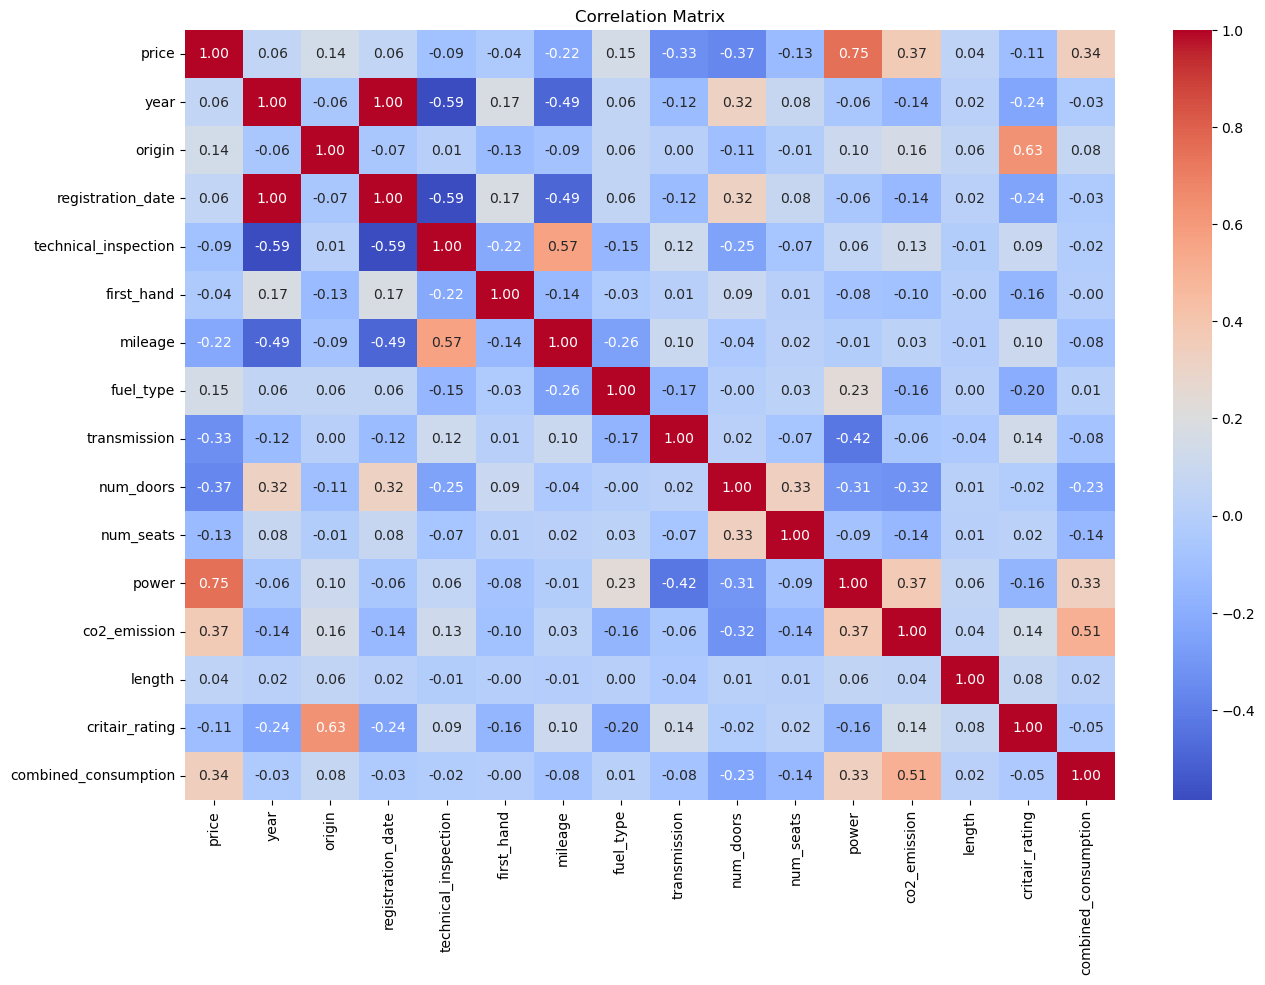

In [162]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the correlation matrix
correlation_matrix = df.drop("name", axis=1).corr()

# Plot a heatmap to visualize correlations
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

/Users/assane/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


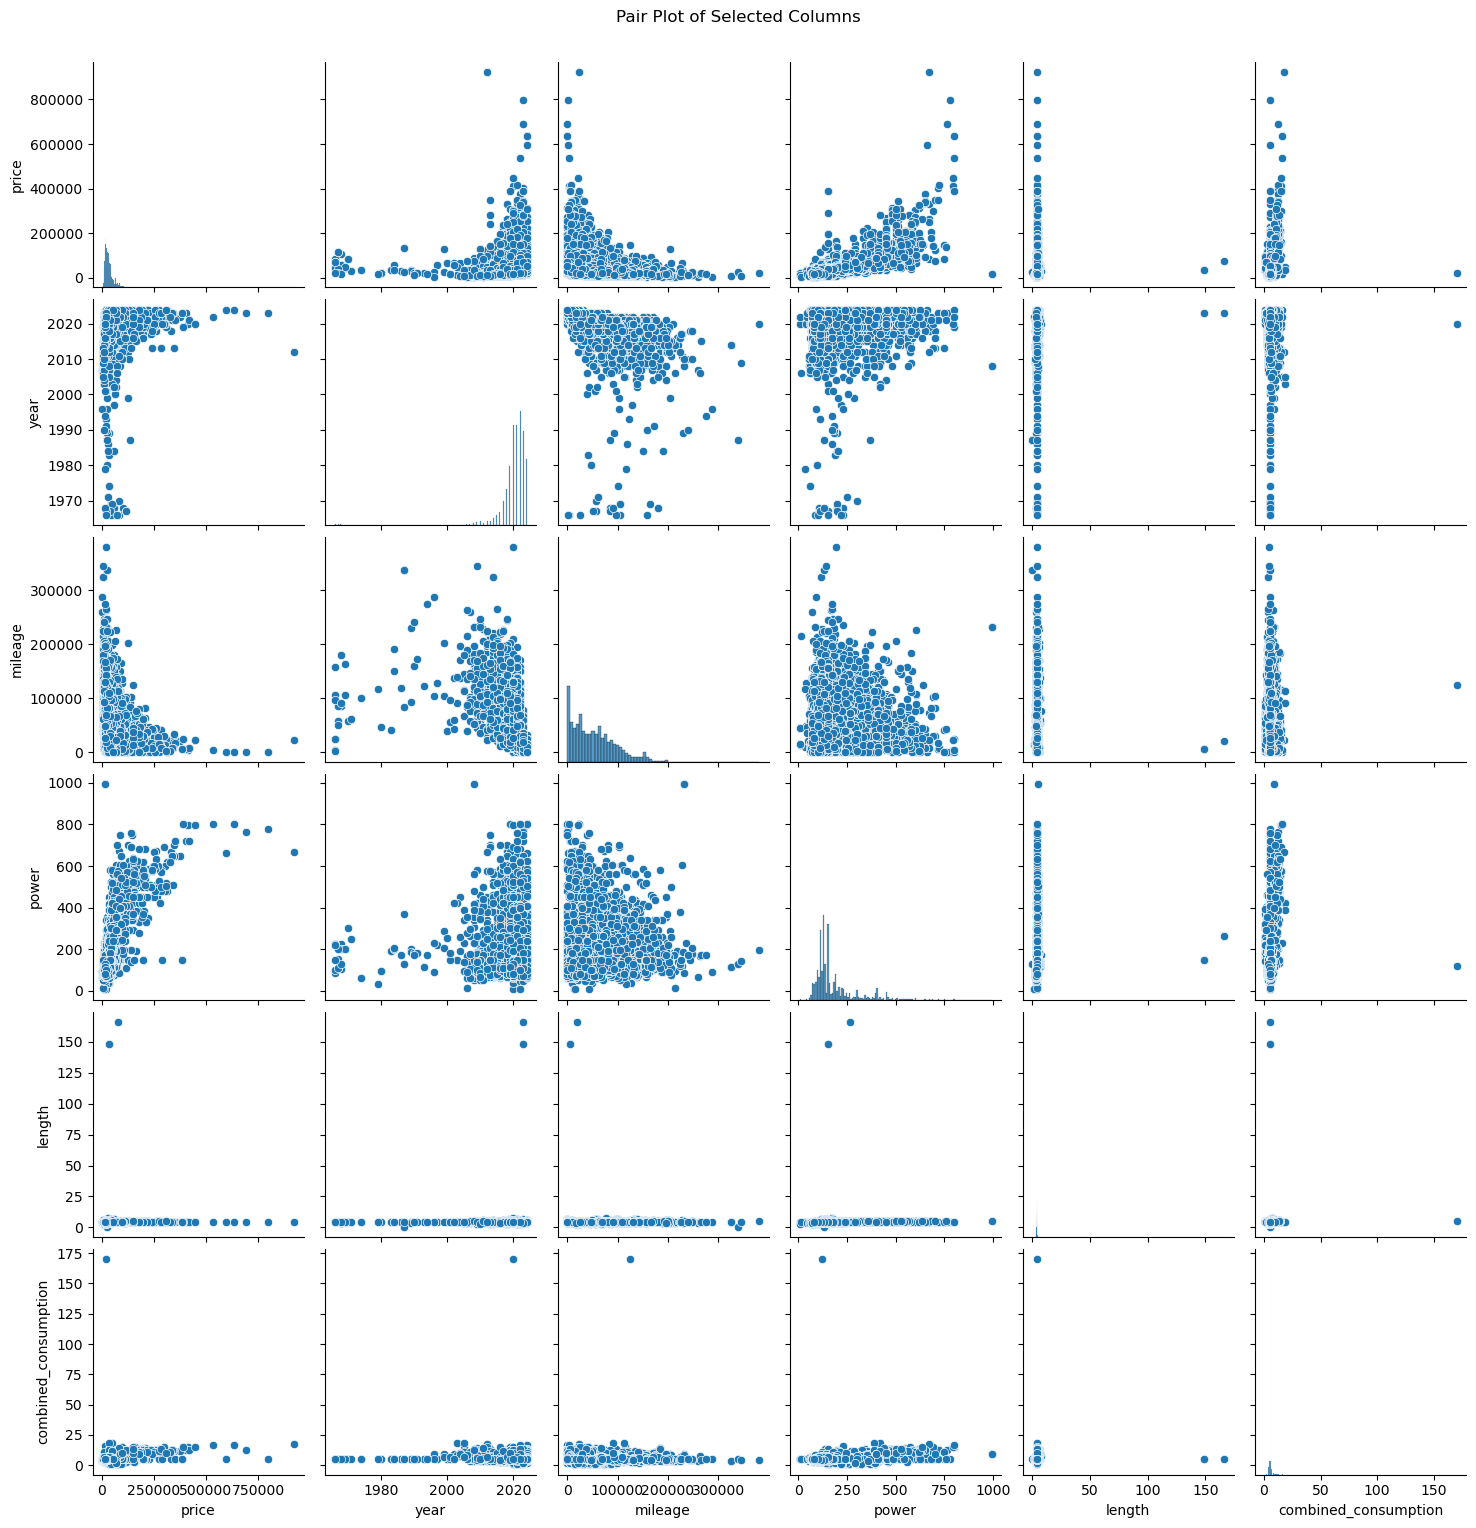

In [163]:
# Select relevant columns for pair plot (we can modify this based on our interest)
columns_for_pair_plot = [
    "price",
    "year",
    "mileage",
    "power",
    "length",
    "combined_consumption",
]

# Create a pair plot
sns.pairplot(df[columns_for_pair_plot])
plt.suptitle("Pair Plot of Selected Columns", y=1.02)
plt.show()

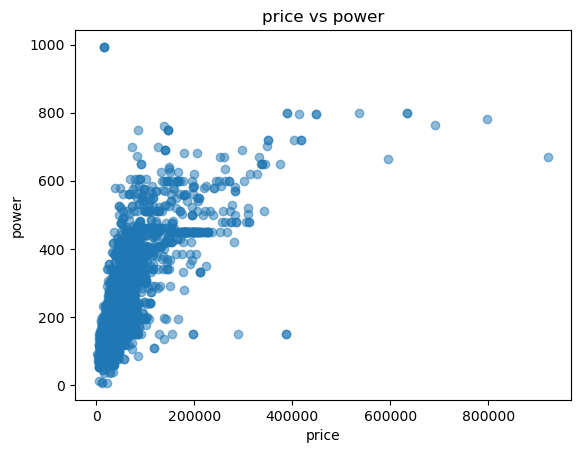

In [164]:
# Select highly correlated pairs (we can modify the threshold as needed)
highly_correlated_pairs = correlation_matrix.abs() > 0.5

# Plot scatterplots for highly correlated pairs
for col in correlation_matrix.columns:
    if highly_correlated_pairs.loc["price", col] and col != "price":
        plt.scatter(df["price"], df[col], alpha=0.5)
        plt.xlabel("price")
        plt.ylabel(col)
        plt.title(f"{'price'} vs {col}")
        plt.show()

### Enregistrement en base

In [203]:
import json

api_url = "http://localhost:8000/api/car_data/"

# Convert the DataFrame to a list of dictionaries
car_data_list = df.to_dict(orient="records")

# Convert datetime objects to strings and round float values
# for car_data in car_data_list:
#     car_data["registration_date"] = car_data["registration_date"].strftime("%Y-%m-%d")
#     car_data["price"] = round(car_data["price"])
#     car_data["mileage"] = round(car_data["mileage"])
#     car_data["length"] = round(car_data["length"])
#     car_data["combined_consumption"] = round(car_data["combined_consumption"])


# Send a POST request to the API endpoint
headers = {"Content-Type": "application/json"}
try:
    response = requests.post(api_url, json=car_data_list, headers=headers)
    if response.status_code == 201:
        print("🚀 Data successfully posted to the API.")
    else:
        print("Failed to post data. Status code:", response.status_code)
        print("Response message", response.content)
except requests.RequestException as e:
    print("An error occurred while sending the POST request:", str(e))
    print(json.dumps(car_data_list, indent=4))

AttributeError: 'float' object has no attribute 'astype'

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8483 entries, 0 to 8482
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   name                  8482 non-null   object        
 1   price                 8482 non-null   float64       
 2   year                  8483 non-null   int64         
 3   origin                8483 non-null   int64         
 4   registration_date     8483 non-null   datetime64[ns]
 5   technical_inspection  8483 non-null   int64         
 6   first_hand            8483 non-null   int64         
 7   mileage               8483 non-null   float64       
 8   fuel_type             8483 non-null   int64         
 9   transmission          8483 non-null   int64         
 10  num_doors             8483 non-null   int64         
 11  num_seats             8483 non-null   int64         
 12  power                 8483 non-null   int64         
 13  co2_emission      

## Dummy Training

In [6]:
import numpy as np
from sklearn.linear_model import LinearRegression
import joblib

# Generate some dummy data
np.random.seed(0)
X = np.random.rand(100, 1)  # Random input
y = 3 * X.squeeze() + 2 + 0.1 * np.random.randn(100)  # Linear relation with some noise

# Train a linear regression model
model = LinearRegression()
model.fit(X, y)

# Save the trained model to a file with the correct filename
joblib.dump(model, "./models/dummy_linear_regression_model.joblib")

print("Model saved successfully as dummy_linear_regression_model.joblib.")

Model saved successfully as dummy_linear_regression_model.joblib.
